In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import torch

# 1 测试

In [2]:
df=pd.read_pickle('/home/ossdata/dengjiebi/data_tiny/validate/bag_acc.pkl')
df.head(5)

,time,Acc_x,Acc_y,Acc_z
0,1497427491760,8.233006,1.399070,-0.712268
100,1497427492760,9.530093,1.326214,-2.746821
200,1497427493760,6.964802,0.956738,-1.583169
300,1497427494760,9.177164,2.414216,-1.188278
400,1497427495760,9.067113,0.996756,-3.465133


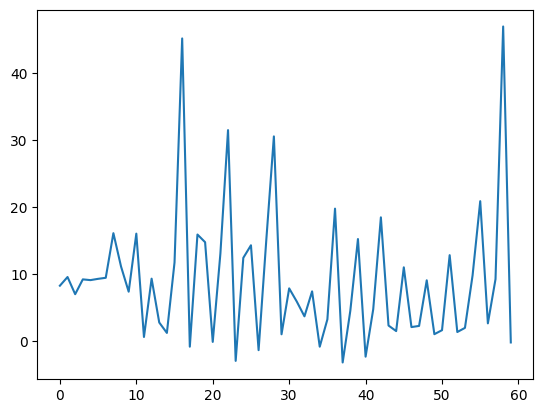

In [164]:
plt.plot(df.iloc[0:60,1].values)

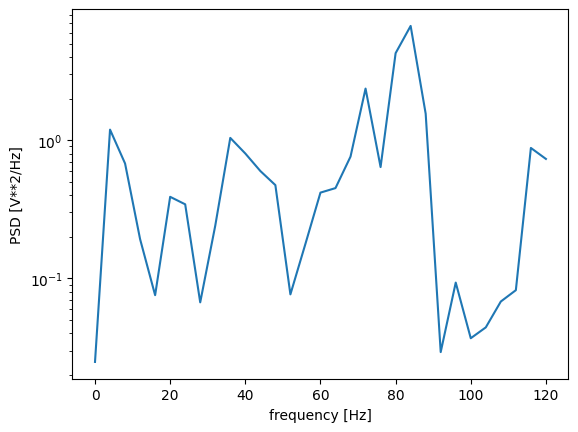

In [87]:
(f, S)= scipy.signal.welch(df.iloc[0:60,1].values, window='hann', fs=240, nperseg=60, scaling='density')

plt.semilogy(f, S)#对数比例图
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

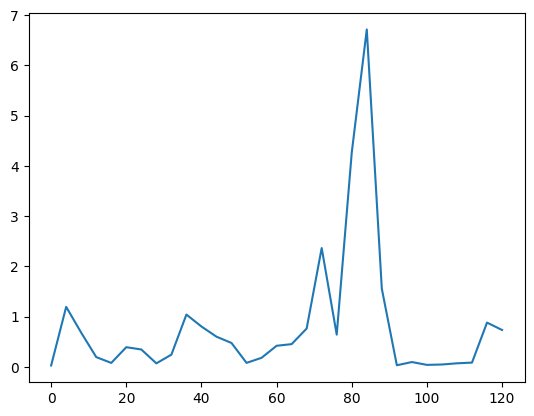

In [88]:
plt.plot(f,S)

# 2 封装成函数

In [2]:
def fft_engineering(df,name,window_size):
    """对给定数据的给定列进行频域特征的计算

    Args:
        df (dataframe): 数据宽
        name (str): 提取特征的列名
        window_size (int): 窗宽
    """
    # 提取数据框中的列为NumPy数组
    data = df[name].values

    # 将数据划分为窗口
    windows = np.lib.stride_tricks.sliding_window_view(data, window_shape=window_size, axis=0)
    
    # 使用welch函数计算所有窗口的功率谱密度
    frequencies, psd = scipy.signal.welch(windows, fs=240,nperseg = 60, axis=1)
    
    # 计算功率谱的均值
    df[name+'_psd_mean']=None #初始化
    df.iloc[30:-29,-1] = np.mean(psd,axis=1)
    
    # 计算功率谱的三个最大分量与对应的频率
    values, indices = torch.tensor(psd).topk(3, dim=1, largest=True, sorted=True)
    indices=indices*4# 索引*4就是对应的频率
    
    df[[name+'_psd_value1',name+'_psd_value2',name+'_psd_value3']]=None #初始化
    values_list = list(map(list, zip(*values.tolist())))
    df.iloc[30:-29,-3] = values_list[0]
    df.iloc[30:-29,-2] = values_list[1]
    df.iloc[30:-29,-1] = values_list[2]
    
    df[[name+'_psd_index1',name+'_psd_index2',name+'_psd_index3']]=None #初始化
    indices_list = list(map(list, zip(*indices.tolist())))
    df.iloc[30:-29,-3] = indices_list[0]
    df.iloc[30:-29,-2] = indices_list[1]
    df.iloc[30:-29,-1] = indices_list[2] 
    
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)    

In [4]:
fft_engineering(df,'Acc_x',60)

In [183]:
fft_engineering(df,'Acc_y',60)

In [184]:
df

,time,Acc_x,Acc_y,Acc_z,Acc_x_psd_mean,Acc_x_psd_value1,Acc_x_psd_value2,Acc_x_psd_value3,Acc_x_psd_index1,Acc_x_psd_index2,Acc_x_psd_index3,Acc_y_psd_mean,Acc_y_psd_value1,Acc_y_psd_value2,Acc_y_psd_value3,Acc_y_psd_index1,Acc_y_psd_index2,Acc_y_psd_index3
0,1497427491760,8.233006,1.399070,-0.712268,0.822404,6.715846,4.264381,2.363371,84.0,80.0,72.0,0.228863,1.147553,0.591766,0.550334,76.0,72.0,40.0
100,1497427492760,9.530093,1.326214,-2.746821,0.822404,6.715846,4.264381,2.363371,84.0,80.0,72.0,0.228863,1.147553,0.591766,0.550334,76.0,72.0,40.0
200,1497427493760,6.964802,0.956738,-1.583169,0.822404,6.715846,4.264381,2.363371,84.0,80.0,72.0,0.228863,1.147553,0.591766,0.550334,76.0,72.0,40.0
300,1497427494760,9.177164,2.414216,-1.188278,0.822404,6.715846,4.264381,2.363371,84.0,80.0,72.0,0.228863,1.147553,0.591766,0.550334,76.0,72.0,40.0
400,1497427495760,9.067113,0.996756,-3.465133,0.822404,6.715846,4.264381,2.363371,84.0,80.0,72.0,0.228863,1.147553,0.591766,0.550334,76.0,72.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395500,1500390028760,-1.462989,6.691926,6.713342,0.000018,0.000103,0.000043,0.000035,4.0,0.0,52.0,0.000013,0.000036,0.000035,0.000028,8.0,92.0,4.0
14395600,1500390029760,-1.477083,6.636727,6.754463,0.000018,0.000103,0.000043,0.000035,4.0,0.0,52.0,0.000013,0.000036,0.000035,0.000028,8.0,92.0,4.0
14395700,1500390030760,-1.472568,6.619833,6.775859,0.000018,0.000103,0.000043,0.000035,4.0,0.0,52.0,0.000013,0.000036,0.000035,0.000028,8.0,92.0,4.0
14395800,1500390031760,-1.472563,6.649087,6.737025,0.000018,0.000103,0.000043,0.000035,4.0,0.0,52.0,0.000013,0.000036,0.000035,0.000028,8.0,92.0,4.0


# 3 全数据的特征工程

## 训练集

In [9]:
df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_acc.pkl')
fft_engineering(df,'bag_acc_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/bag_acc.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_gyr.pkl')
fft_engineering(df,'bag_gyr_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/bag_gyr.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_mag.pkl')
fft_engineering(df,'bag_mag_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/bag_mag.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/bag_speed.pkl')
fft_engineering(df,'bag_horizontal_speed',60)
fft_engineering(df,'bag_vertical_speed',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/bag_speed.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 30 个特征


In [10]:
df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_acc.pkl')
fft_engineering(df,'hand_acc_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/hand_acc.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_gyr.pkl')
fft_engineering(df,'hand_gyr_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/hand_gyr.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_mag.pkl')
fft_engineering(df,'hand_mag_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/hand_mag.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hand_speed.pkl')
fft_engineering(df,'hand_horizontal_speed',60)
fft_engineering(df,'hand_vertical_speed',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/hand_speed.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 30 个特征


In [11]:
df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_acc.pkl')
fft_engineering(df,'hips_acc_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/hips_acc.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_gyr.pkl')
fft_engineering(df,'hips_gyr_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/hips_gyr.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_mag.pkl')
fft_engineering(df,'hips_mag_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/hips_mag.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/hips_speed.pkl')
fft_engineering(df,'hips_horizontal_speed',60)
fft_engineering(df,'hips_vertical_speed',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/hips_speed.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 30 个特征


In [12]:
df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_acc.pkl')
fft_engineering(df,'torso_acc_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/torso_acc.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_gyr.pkl')
fft_engineering(df,'torso_gyr_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/torso_gyr.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_mag.pkl')
fft_engineering(df,'torso_mag_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/torso_mag.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/train/torso_speed.pkl')
fft_engineering(df,'torso_horizontal_speed',60)
fft_engineering(df,'torso_vertical_speed',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/train/torso_speed.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 30 个特征


## 验证集

In [13]:
#bag
df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_acc.pkl')
fft_engineering(df,'bag_acc_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_acc.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_gyr.pkl')
fft_engineering(df,'bag_gyr_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_gyr.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_mag.pkl')
fft_engineering(df,'bag_mag_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_mag.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_speed.pkl')
fft_engineering(df,'bag_horizontal_speed',60)
fft_engineering(df,'bag_vertical_speed',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/bag_speed.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

#hand
df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_acc.pkl')
fft_engineering(df,'hand_acc_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_acc.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_gyr.pkl')
fft_engineering(df,'hand_gyr_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_gyr.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_mag.pkl')
fft_engineering(df,'hand_mag_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_mag.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_speed.pkl')
fft_engineering(df,'hand_horizontal_speed',60)
fft_engineering(df,'hand_vertical_speed',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/hand_speed.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))


#hips
df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_acc.pkl')
fft_engineering(df,'hips_acc_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_acc.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_gyr.pkl')
fft_engineering(df,'hips_gyr_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_gyr.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_mag.pkl')
fft_engineering(df,'hips_mag_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_mag.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_speed.pkl')
fft_engineering(df,'hips_horizontal_speed',60)
fft_engineering(df,'hips_vertical_speed',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/hips_speed.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))


#torso
df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_acc.pkl')
fft_engineering(df,'torso_acc_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_acc.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_gyr.pkl')
fft_engineering(df,'torso_gyr_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_gyr.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_mag.pkl')
fft_engineering(df,'torso_mag_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_mag.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_speed.pkl')
fft_engineering(df,'torso_horizontal_speed',60)
fft_engineering(df,'torso_vertical_speed',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/validate/torso_speed.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 30 个特征
当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 30 个特征
当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 30 个特征
当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 30 个特征


## 测试集

In [14]:
#test
df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/test/test_acc.pkl')
fft_engineering(df,'test_acc_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/test/test_acc.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/test/test_gyr.pkl')
fft_engineering(df,'test_gyr_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/test/test_gyr.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/test/test_mag.pkl')
fft_engineering(df,'test_mag_L2',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/test/test_mag.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

df=pd.read_pickle('/home/ossdata/dengjiebi/data_full/test/test_speed.pkl')
fft_engineering(df,'test_horizontal_speed',60)
fft_engineering(df,'test_vertical_speed',60)
df.to_pickle('/home/ossdata/dengjiebi/data_full/test/test_speed.pkl')
print('当前数据集一共有 {} 个特征'.format(len(df.columns)))

当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 39 个特征
当前数据集一共有 30 个特征
